In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import learning_curve

In [4]:
path = "train/"
df_train = pd.read_csv(path + "all_keypoints.csv", delimiter=";")
x_train = df_train.iloc[:, 2:].to_numpy()
y_train = df_train["class"]
y_train.to_numpy()

path = "valid/"
df_val = pd.read_csv(path + "all_keypoints.csv", delimiter=";")
x_val = df_val.iloc[:, 2:].to_numpy()
y_val = df_val["class"].to_numpy()

path = "test/"
df_test = pd.read_csv(path + "all_keypoints.csv", delimiter=";")
x_test = df_test.iloc[:, 2:].to_numpy()
y_test = df_test["class"].to_numpy()

x = np.vstack((x_train, x_val))
y = np.hstack((y_train, y_val))

df_train.head()

,filename,class,0,1,2,3,4,5,6,7,...,1394,1395,1396,1397,1398,1399,1400,1401,1402,Unnamed: 1405
0,img_001647_jpg.rf.6b8b57b958ca1129df2b07b0894f...,Engaged,0.477401,0.689527,-0.015054,0.484492,0.659317,-0.041307,0.480034,0.665531,...,-0.003646,0.498314,0.594094,-0.009697,0.541923,0.585931,0.012465,0.545758,0.582824,0.012944
1,img_000817_jpg.rf.418da3f3899c4004dd2961accf20...,Confusion,0.463258,0.679552,-0.021432,0.457595,0.643239,-0.047642,0.460066,0.652895,...,-0.004534,0.470298,0.576350,-0.010996,0.521273,0.559552,0.001972,0.526257,0.555053,0.001506
2,img_001714_jpg.rf.704d452be060f91f9aab1a9f446f...,Engaged,0.490912,0.703257,-0.013543,0.493603,0.671547,-0.042487,0.492077,0.677883,...,-0.008459,0.508832,0.602887,-0.014218,0.556645,0.589489,0.001887,0.560268,0.586643,0.001647
3,img_001799_jpg.rf.a87b792d3617f2fa31fc6dc8c7f1...,Engaged,0.437817,0.490217,-0.020038,0.433354,0.450080,-0.040992,0.436644,0.460370,...,-0.005381,0.452863,0.375091,-0.010293,0.504004,0.356637,-0.001960,0.509774,0.350223,-0.002576
4,img_000920_jpg.rf.57454afbde7e52cb275e3a894804...,Boredom,0.656678,0.872208,-0.011119,0.657698,0.842539,-0.042086,0.659062,0.848852,...,-0.014668,0.687215,0.774991,-0.019777,0.742931,0.770813,-0.009770,0.748287,0.766542,-0.010310


In [28]:
def plot_learning_curve(sizes,train,val):
    train_scores_mean = np.mean(train, axis=1)
    train_scores_std = np.std(train, axis=1)
    val_scores_mean = np.mean(val, axis=1)
    val_scores_std = np.std(val, axis=1)

    _, axes = plt.subplots(1,)
    axes.grid()
    axes.fill_between(
        sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.fill_between(
        sizes,
        val_scores_mean - val_scores_std,
        val_scores_mean + val_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.plot(
        sizes, train_scores_mean, "o-", color="g", label="Training score"
    )
    axes.plot(
        sizes, val_scores_mean, "o-", color="r", label="Cross-validation score"
    )
    axes.legend(loc="best")
    
    plt.title("Training and Validation Accuracy Curves")
    plt.xlabel('Samples')
    plt.ylabel('Accuracy')
    plt.show()
    return

In [6]:
n_folds = 10 # Max 15 folds
cv = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [23]:
# create the pipeline:
preprocessing = Pipeline([('pp', Normalizer())])  

# Feature selection, you can also try others
feature_selection = Pipeline([('selectkbest', SelectKBest())])  

classifier = Pipeline([('clf', DecisionTreeClassifier())])

pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('feature_selection', feature_selection),
    ('classifier', classifier)])

# You may need to specify other hyperparameters here if you investigate other blocks
k_grid = ["all"]
alpha_grid = [0]
depth_grid = [750]

# And make sure to add them to your param_grid
param_grid = {
    'feature_selection__selectkbest__k' : k_grid,
    'classifier__clf__ccp_alpha' : alpha_grid,
    'classifier__clf__max_depth' : depth_grid,
}

# define GridSearchCV object
gridsearch = GridSearchCV(pipe, param_grid, n_jobs=4, cv=cv, verbose=3, return_train_score=True)

# Train the pipeline
gridsearch.fit(x,y)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('pp', Normalizer())])),
                                       ('feature_selection',
                                        Pipeline(steps=[('selectkbest',
                                                         SelectKBest())])),
                                       ('classifier',
                                        Pipeline(steps=[('clf',
                                                         DecisionTreeClassifier())]))]),
             n_jobs=4,
             param_grid={'classifier__clf__ccp_alpha': [0],
                         'classifier__clf__max_depth': [700, 750, 800],
                         'feature_selection__selectkbest__k': ['all']},
             return_train_score=True, verbose=3)

In [24]:
results = gridsearch.cv_results_
train_score = results['mean_train_score'][gridsearch.best_index_]
validation_score = results['mean_test_score'][gridsearch.best_index_]

print('Average training accuracy across folds: {:.3}'.format(train_score))
print('Average validation accuracy across folds: {:.3}'.format(validation_score))

print(gridsearch.best_params_)

Average training accuracy across folds: 1.0
Average validation accuracy across folds: 0.575
{'classifier__clf__ccp_alpha': 0, 'classifier__clf__max_depth': 750, 'feature_selection__selectkbest__k': 'all'}


In [25]:
best_model = gridsearch.best_estimator_
train_sizes, train_scores, val_scores = learning_curve(best_model, x, y, cv=cv, n_jobs=16, verbose=5)

[learning_curve] Training set sizes: [ 159  518  877 1236 1595]


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   7 out of  50 | elapsed:   31.1s remaining:  3.2min
[Parallel(n_jobs=16)]: Done  18 out of  50 | elapsed:   55.5s remaining:  1.6min
[Parallel(n_jobs=16)]: Done  29 out of  50 | elapsed:  1.3min remaining:   57.6s
[Parallel(n_jobs=16)]: Done  40 out of  50 | elapsed:  1.6min remaining:   24.7s
[Parallel(n_jobs=16)]: Done  50 out of  50 | elapsed:  1.9min finished


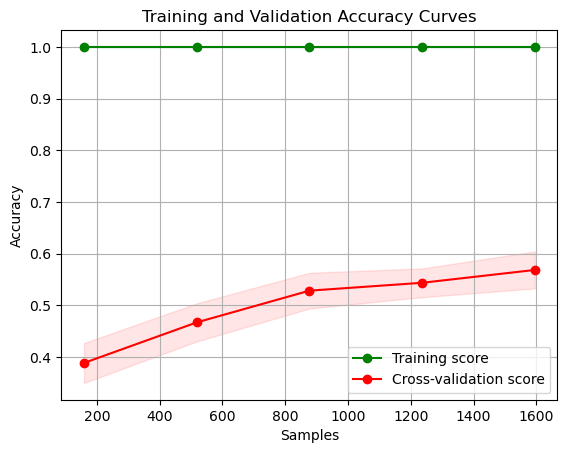

[CV] END ..................., score=(train=1.000, test=0.545) total time=  26.0s
[CV] END ..................., score=(train=1.000, test=0.542) total time=  28.5s
[CV] END ..................., score=(train=1.000, test=0.362) total time=   3.7s
[CV] END ..................., score=(train=1.000, test=0.429) total time=  14.9s
[CV] END ..................., score=(train=1.000, test=0.517) total time=  59.3s
[CV 5/10] END classifier__clf__ccp_alpha=0, classifier__clf__max_depth=1000, feature_selection__selectkbest__k=all;, score=(train=1.000, test=0.588) total time=  16.0s
[CV 9/10] END classifier__clf__ccp_alpha=0, classifier__clf__max_depth=1000, feature_selection__selectkbest__k=all;, score=(train=1.000, test=0.542) total time=  12.8s
[CV 3/10] END classifier__clf__ccp_alpha=0, classifier__clf__max_depth=700, feature_selection__selectkbest__k=all;, score=(train=1.000, test=0.489) total time=  10.5s
[CV 6/10] END classifier__clf__ccp_alpha=0, classifier__clf__max_depth=700, feature_selectio

In [29]:
plot_learning_curve(train_sizes, train_scores, val_scores)

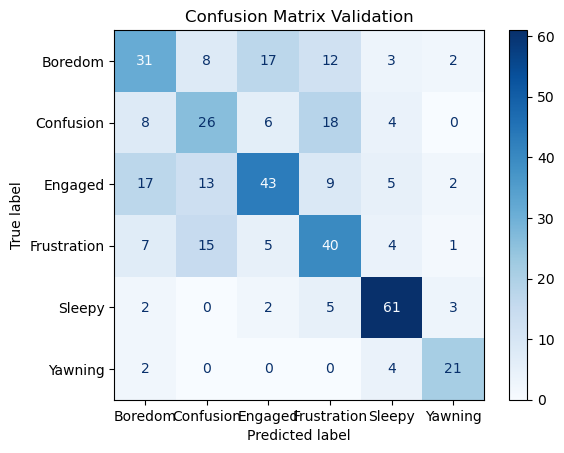

In [27]:
# Compute confusion matrix on validation set
best_model.fit(x_train, y_train)
val_predictions = best_model.predict(x_val)
cm = confusion_matrix(y_val, val_predictions)

# Assuming you have class names, replace it with your actual class names or labels
class_names = [str(i) for i in np.unique(y)]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format=".4g")
plt.title("Confusion Matrix Validation")
plt.show()